In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.cluster import KMeans

from kneed import KneeLocator

In [2]:
# Lecture des fichiers 
path = "data"
dfs = dict()
for dir_item in os.listdir(path):
    dir_item_path = os.path.join(path, dir_item)
    print(dir_item_path)
    if os.path.isfile(dir_item_path) and dir_item_path[:8] == "data/Exp":
        dfs[dir_item] = pd.read_csv(dir_item_path, sep=";")
dfs.keys()

data/.ipynb_checkpoints
data/ExportBales.csv
data/README.md
data/ExportBales_2.csv
data/LICENSE
data/ExportBales_1.csv
data/ExportBales_4_1.csv
data/ExportBales_4.csv


dict_keys(['ExportBales.csv', 'ExportBales_2.csv', 'ExportBales_1.csv', 'ExportBales_4_1.csv', 'ExportBales_4.csv'])

In [3]:
def clustering(data, nb_clust, path) :
    # nettoyage
    data.drop(inplace=True, columns=data.columns[-5:])
    # Calcul du nombre de clusters voulus
    
    X = data.loc[:,["latitude", "longitude"]]

    # Clustering
    kmeans = KMeans(n_clusters=nb_clust, n_init=10, max_iter=300, tol=0.0001, random_state=42)
    kmeans.fit(X)
    print(nb_clust, kmeans.inertia_, flush=True)
    centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=X.columns)

    # Plot des données et des centres 
    plt.figure(figsize=(19,10))
    labels = kmeans.labels_
    plt.scatter(X["latitude"], X["longitude"], c=labels, cmap="Paired")
    plt.scatter(centers["latitude"], centers["longitude"], marker="*", c=list(centers.index), s=500, cmap="Paired")
    plt.show()
    
    # Export des données avec leur cluster + centres 
    X["cluster"] = labels
    X.to_csv("cluster/"+path[:-4]+"_cl.csv")

ExportBales.csv
3 3.344559779120917


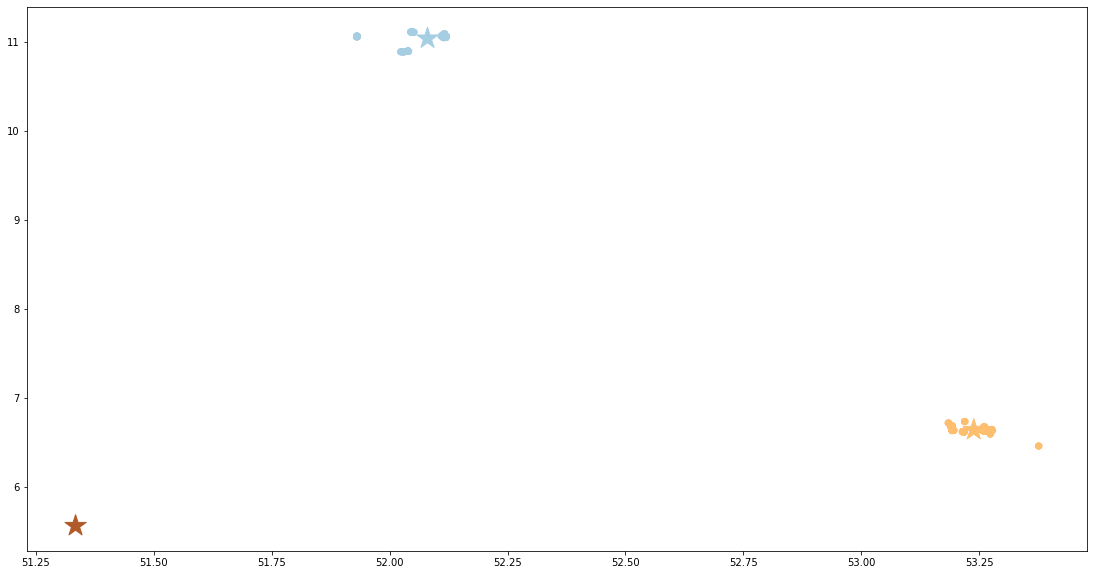

ExportBales_2.csv
3 1.8557970336907323e-06


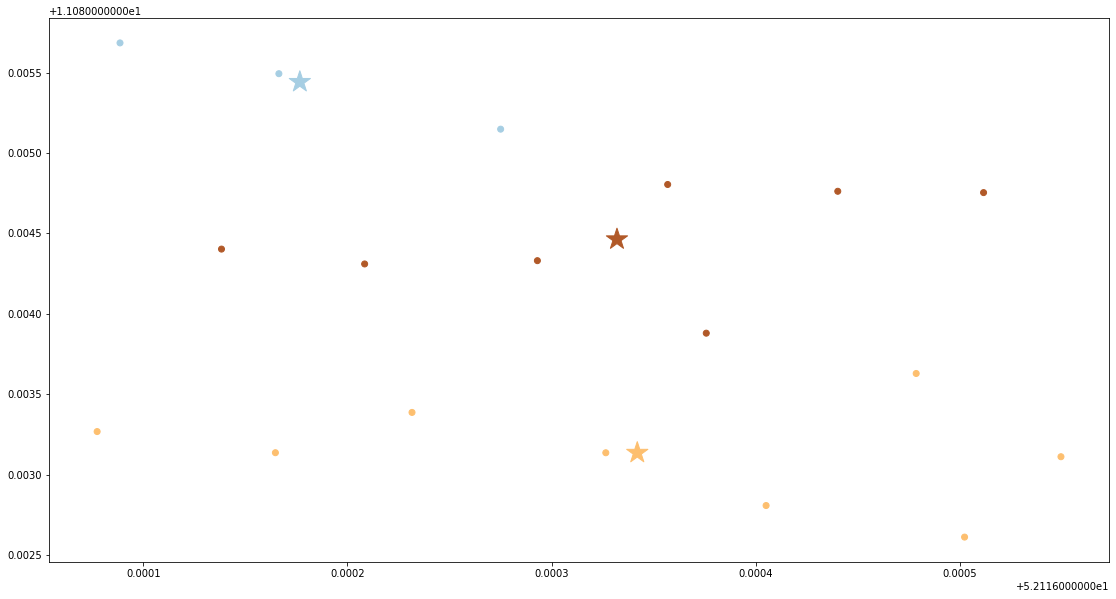

ExportBales_1.csv
3 7.64430395179505e-06


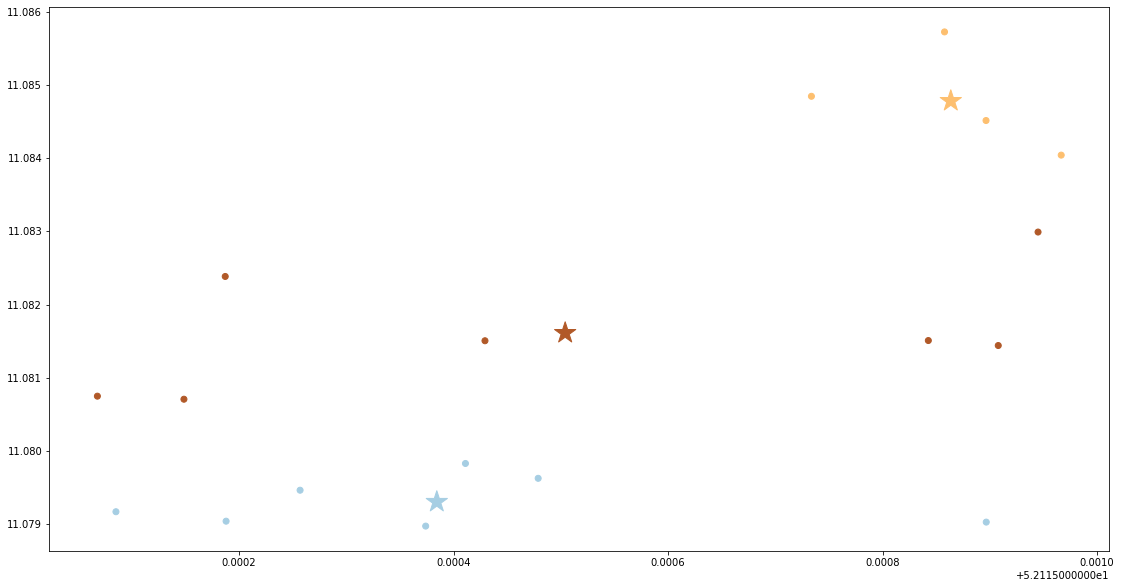

ExportBales_4_1.csv
3 2.2244970986811113e-05


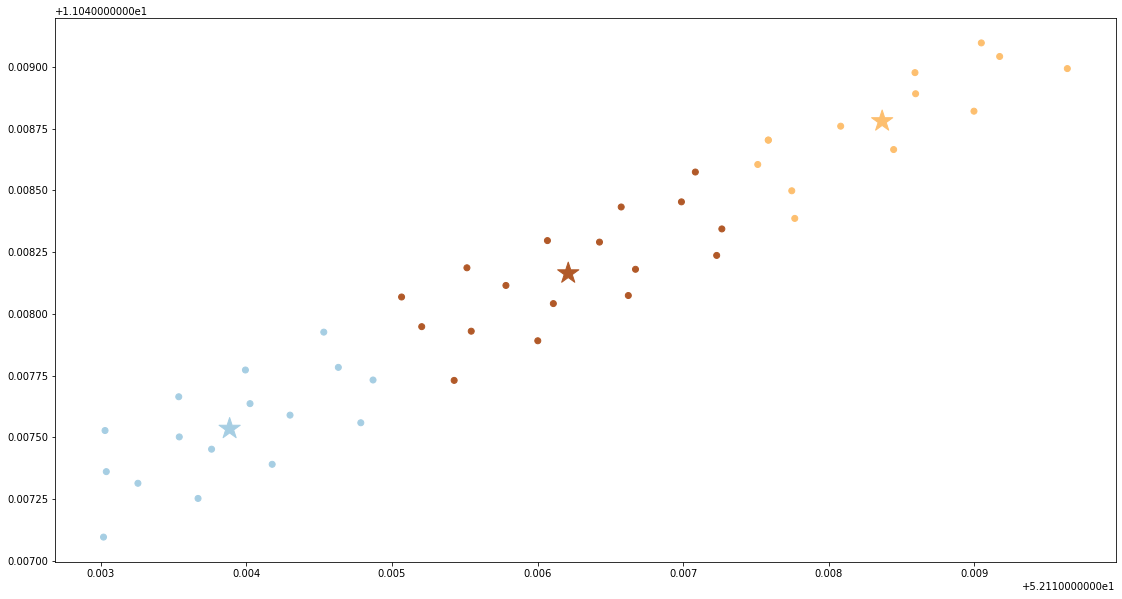

ExportBales_4.csv
3 1.7033681592316368e-05


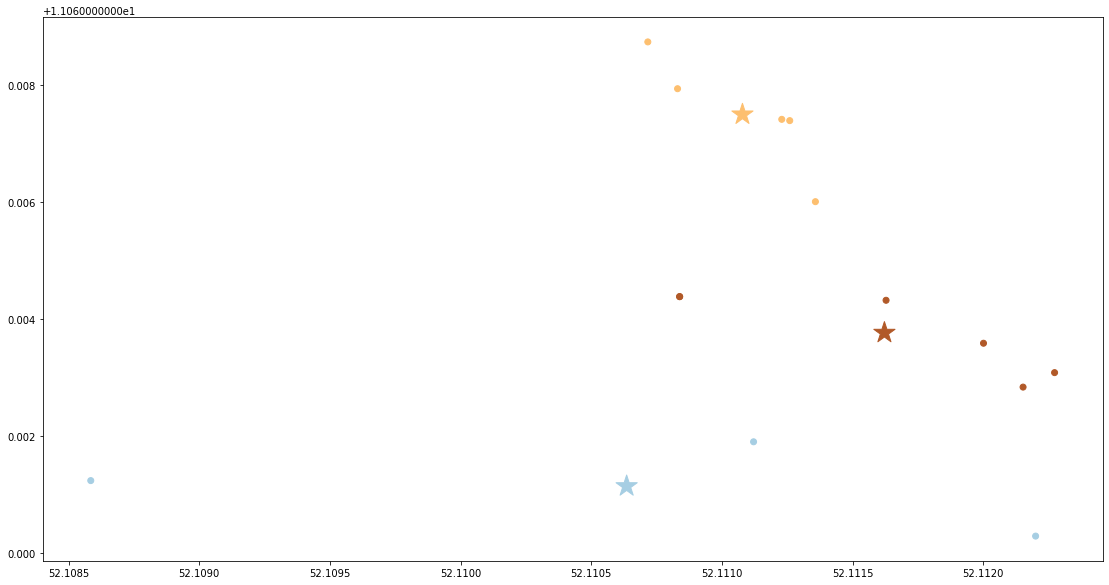

In [4]:
for key in dfs.keys():
    print(key)
    clustering(dfs[key], 3, key)